In [1]:
from time import sleep
import numpy
import QDevil_QDAC2 as QDAC2
qdac_addr = '192.168.8.15'
qdac = QDAC2.QDac2('QDAC2', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/210917-5631-qcodes.log
Connected to: QDevil QDAC-II (serial:0, firmware:3-0.9.11) in 0.42s


In [2]:
qdac.reset()
sleep(3)

In [3]:
# Put a 1 kOhm resistor on channel 5
gate = qdac.channel(5)
gate.output_mode(range='low', high_current_limit_A=0.0002)
gate.dc_constant_V(0.1)
qdac.errors()

'0, "No error"'

In [4]:
measurement = gate.measurement(repetitions=10, nplc=1)
measurement.start()
qdac.errors()

'0, "No error"'

In [5]:
measurement.n_available()

10

In [6]:
measurement.peek_A()

-0.0016808

In [7]:
print(measurement.available_A())
qdac.errors()

['-0.0016818', '-0.0016814', '-0.0016818', '-0.0016818', '-0.0016819', '-0.0016819', '-0.0016817', '-0.0016816', '-0.0016804', '-0.0016808']


'0, "No error"'

In [8]:
measurement.abort()
qdac.errors()

'0, "No error"'

Starting experimental run with id: 188. 


  0%|          | 0/10 [00:00<?, ?it/s]

(results #188@/Users/jps/experiments.db
 --------------------------------------
 QDAC2_ch05_dc_constant_V - numeric
 QDAC2_ch05_read_current_A - numeric,
 [<AxesSubplot:title={'center':'Run #188, Experiment json-export-subscriber-test (no-sample)'}, xlabel='ch5 (V)', ylabel='ch5 (mA)'>],
 [None])

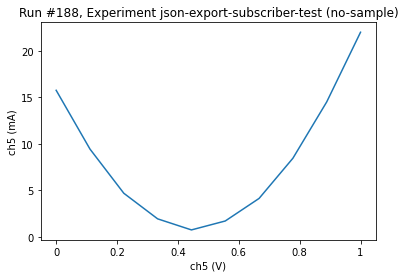

In [12]:
gate.dc_constant_V(0)
gate.dc_slew_rate_V_per_s(0.05)
gate.measurement_count(1)
from qcodes.utils.dataset.doNd import do1d
delay_s = 0.1 / gate.dc_slew_rate_V_per_s() + 0.01
do1d(gate.dc_constant_V, 0, 1, 10, delay_s, gate.read_current_A, show_progress=True, do_plot = True)
#  do1d(_param_set, start, stop, num_points, delay, _param)

In [13]:
gate.dc_constant_V(0)
print(delay_s)

2.01
